Our polynomial is 0.63x^3 - 3.35x^2 + 8.82x^1 - 5.1


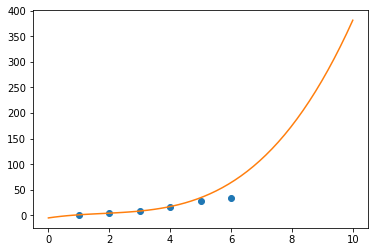

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def poly_func(f, x):
    """f is a list of the polynomial coefficients where the index
    matches the variable exponent. x is the point to evaluate f at"""
    y = 0
    for i in range(len(f)):
        y +=  f[i]*(x)**i
    return y

def poly_print(x, r=6):
    if x[0] > 0:
        constant = " + " + str(round(x[0], r))
    elif x[0] < 0:
        constant = " - " + str(-round(x[0], r))
    else:
        constant = ""
        
    if len(x) == 1:
        return "Our polynomial is" + constant
    
    output = "Our polynomial is " + str(round(x[-1], r)) + "x^" + str(len(x)-1)
    
    for i in range(len(x)-2, 0, -1):
        if x[i] > 0:
            output += " + " + str(round(x[i], r)) + "x^" + str(i)
        elif x[i] < 0:
            output += " - " + str(-round(x[i], r)) + "x^" + str(i)
            
    output += constant
    print(output)

def fd_build(x, y, iters=0):
    """Returns an array of forward differences and removes zero rows. First row is always y.
    iters governs the amount of fd's to calculate."""
    if iters:
        size = iters
    else:
        size = len(x)
    cut = 0
    fd = np.vstack((y, np.zeros((size-1, len(x)))))
    for i in range(1, size):
        counter = size-i
        zero_row = 1
        for j in range(counter):
            fd[i, j] = (fd[i-1, j+1] - fd[i-1, j])/(x[i+j] - x[j])
            if fd[i, j] and zero_row:
                zero_row -= 1
        if not zero_row:
            cut += 1
        if cut == i-1:
            for i in range(1, size-cut):
                fd = np.delete(fd, (size - i), 0)
            return fd
    return fd

def newton_dd(x, y, fd=0):
    """Finds the unique polynomial of order n-1 that passes through all 
    points in x (x having n points). Output is a list of polynomial
    coefficients whose index matches the variables' exponent. fd is the
    order of the approximation (fd=2 gives a quadratic approximation)"""
    
    final = []
    final_dict = {}
    if fd and fd < len(x)-1:
        iterations = fd + 1
        y = fd_build(x, y, iterations)
    else:
        y = fd_build(x, y, len(x))
        iterations = y.shape[0]
    iterations = y.shape[0]
        
    for i in range(iterations):
        final_dict['x' + str(i)] = 0
    
    # This for loop represents the summation in the DD method
    for i in range(2, iterations):
        li = [-x[0], 1]
        
        # This for loop represents the prouct part nested in the summation
        for j in range(1, i):
            variables = {}
            product = [-x[j], 1]
            # The following loops perform the actual multiplication. 
            # Two brackets are multiplied at a time. The results of the
            # multipication are stored in a dictionary.
            for var in range(len(li)):
                for n in range(2):
                    value = li[var]*product[n]
                    key = 'x' + str(var + n)
                    if key in variables:
                        variables[key] += value
                    else:
                        variables[key] = value
            # The multiplication results form a new list which is used for multiplication
            li = []
            for order in range(len(variables)):
                li += [variables['x' + str(order)]]
                
        scalar = y[i, 0]
        # After all the brackets have multiplied that term of the sum is saved
        for dump in variables:
            final_dict[dump] += scalar*variables[dump]   
    final_dict["x0"] += y[0, 0]  
    final_dict["x0"] += y[1, 0]*(-x[0])
    final_dict["x1"] += y[1, 0]
    for i in range(iterations):
        final += [final_dict['x' + str(i)]]
    return final

    

x = [1, 2, 3, 4, 5, 6]
y = [1, 4.2, 8.3, 17.1, 27, 33]
approximation_order = 3 # The order of the polynomial used to appoximate the set of given points
poly = newton_dd(x, y, approximation_order)

xnew = np.linspace(0, 10, 50)
ynew = poly_func(poly, xnew)
poly_print(poly, 2)

plt.plot(x, y, 'o')
plt.plot(xnew, ynew)